<a href="https://colab.research.google.com/github/Leohrithik/Machine-_Learning-Models/blob/main/MLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [26]:
dfe=pd.read_csv('/content/weatherAUS.csv')
dfe

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [27]:
df=dfe.iloc[139113:142304]

In [28]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139113,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,No
139114,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,No
139115,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,No
139116,2008-07-06,Darwin,16.2,31.9,0.0,7.2,10.7,E,41.0,ESE,...,62.0,18.0,1015.8,1012.2,0.0,0.0,22.8,30.5,No,No
139117,2008-07-07,Darwin,17.0,32.7,0.0,5.2,7.8,E,48.0,SE,...,54.0,18.0,1016.7,1013.1,5.0,2.0,23.3,31.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No
142302,2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0,ENE,...,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,No,No


In [ ]:
df['Date']=df['Date'].str.replace('-','')
df['Date']=df['Date'].astype(int)

In [30]:
df['Date'].value_counts()

20080703    1
20140721    1
20140723    1
20140724    1
20140725    1
           ..
20110704    1
20110705    1
20110706    1
20110707    1
20170625    1
Name: Date, Length: 3191, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 139113 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3191 non-null   int64  
 1   Location       3191 non-null   object 
 2   MinTemp        3190 non-null   float64
 3   MaxTemp        3190 non-null   float64
 4   Rainfall       3191 non-null   float64
 5   Evaporation    3137 non-null   float64
 6   Sunshine       3187 non-null   float64
 7   WindGustDir    3145 non-null   object 
 8   WindGustSpeed  3149 non-null   float64
 9   WindDir9am     3163 non-null   object 
 10  WindDir3pm     3188 non-null   object 
 11  WindSpeed9am   3189 non-null   float64
 12  WindSpeed3pm   3189 non-null   float64
 13  Humidity9am    3190 non-null   float64
 14  Humidity3pm    3189 non-null   float64
 15  Pressure9am    3190 non-null   float64
 16  Pressure3pm    3189 non-null   float64
 17  Cloud9am       3190 non-null   float64
 18  C

In [ ]:
le=LabelEncoder()
lst=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [33]:
df['RainTomorrow']=df['RainTomorrow'].map({'No':0,'Yes':1})

<ipython-input-33-e64a818fc83d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow']=df['RainTomorrow'].map({'No':0,'Yes':1})


In [34]:
df['RainTomorrow']. value_counts()

0.0    2338
1.0     852
Name: RainTomorrow, dtype: int64

In [35]:
df.isnull().sum()

Date              0
Location          0
MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation      54
Sunshine          4
WindGustDir       0
WindGustSpeed    42
WindDir9am        0
WindDir3pm        0
WindSpeed9am      2
WindSpeed3pm      2
Humidity9am       1
Humidity3pm       2
Pressure9am       1
Pressure3pm       2
Cloud9am          1
Cloud3pm          3
Temp9am           0
Temp3pm           2
RainToday         0
RainTomorrow      1
dtype: int64

In [ ]:
lst1=['WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm', 'Cloud9am','Cloud3pm','RainToday','RainTomorrow']
for i in lst1:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
lst2=['MinTemp','MaxTemp','Rainfall','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Evaporation','Sunshine']
for i in lst2:
  df[i]=df[i].fillna(df[i].mean())

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [39]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [40]:
df['RainTomorrow'].value_counts()

0.0    2339
1.0     852
Name: RainTomorrow, dtype: int64

In [41]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,NaN,1.000000,0.462870,0.053384,-0.151559,-0.338223,0.364371,0.005394,0.208994,0.290237,...,0.525958,0.608441,-0.608903,-0.610519,0.443145,0.451297,0.853135,0.311589,0.216073,0.336831
MaxTemp,NaN,0.462870,1.000000,-0.302437,0.142247,0.406322,-0.045351,-0.125554,-0.060362,-0.015300,...,0.016598,-0.122293,0.026574,-0.042686,-0.135782,-0.140746,0.655201,0.799036,-0.189345,-0.149545
Rainfall,NaN,0.053384,-0.302437,1.000000,-0.009372,-0.445616,0.184983,0.305680,0.133901,0.139858,...,0.362428,0.368325,-0.412004,-0.395161,0.312683,0.294563,-0.061515,-0.280900,0.509167,0.321664
Evaporation,NaN,-0.151559,0.142247,-0.009372,1.000000,0.262715,-0.107527,0.143085,-0.014249,-0.097632,...,-0.390974,-0.348378,0.306443,0.270899,-0.231100,-0.278442,-0.109121,0.162734,-0.246479,-0.214493
Sunshine,NaN,-0.338223,0.406322,-0.445616,0.262715,1.000000,-0.290074,-0.233656,-0.222354,-0.229121,...,-0.552860,-0.677690,0.618749,0.563993,-0.662060,-0.675149,-0.082883,0.496170,-0.538741,-0.577504
WindGustDir,NaN,0.364371,-0.045351,0.184983,-0.107527,-0.290074,1.000000,-0.029939,0.427400,0.529413,...,0.321055,0.440985,-0.453421,-0.449392,0.266998,0.260426,0.321148,-0.088788,0.255956,0.248023
WindGustSpeed,NaN,0.005394,-0.125554,0.305680,0.143085,-0.233656,-0.029939,1.000000,0.145107,0.041530,...,0.007295,0.062937,-0.194107,-0.186240,0.137250,0.139105,-0.088921,-0.139813,0.220269,0.307465
WindDir9am,NaN,0.208994,-0.060362,0.133901,-0.014249,-0.222354,0.427400,0.145107,1.000000,0.450236,...,0.133644,0.255733,-0.331006,-0.321168,0.215147,0.200343,0.140729,-0.075151,0.164560,0.210152
WindDir3pm,NaN,0.290237,-0.015300,0.139858,-0.097632,-0.229121,0.529413,0.041530,0.450236,1.000000,...,0.266281,0.377086,-0.420364,-0.418497,0.243717,0.237573,0.274908,-0.036751,0.246620,0.259965


<Axes: >

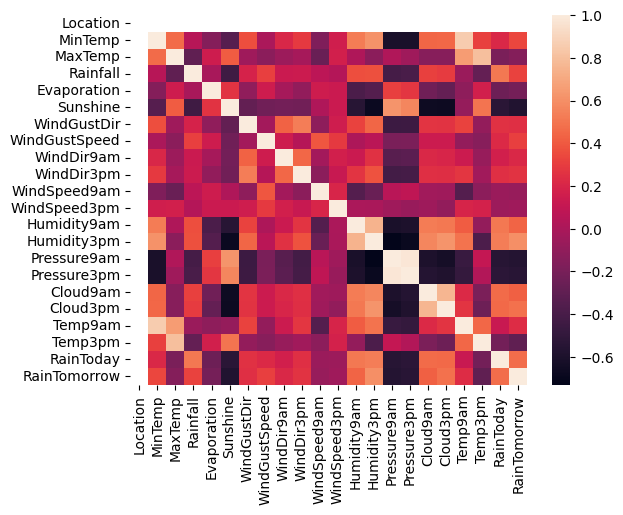

In [42]:
sns.heatmap(df.corr())

<Axes: xlabel='RainTomorrow', ylabel='count'>

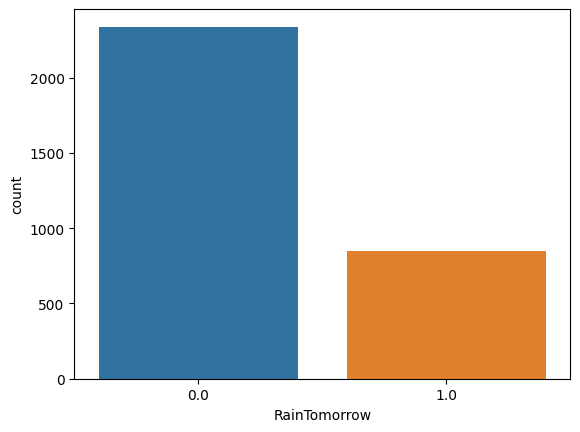

In [43]:
sns.countplot(x=df['RainTomorrow'])

In [44]:
X=df.iloc[:,:-1]
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
139113,0,18.2,31.800000,0.0,8.0,11.000000,0,46.0,2,1,...,19.0,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,0
139114,0,17.3,30.700000,0.0,7.0,10.400000,0,44.0,9,0,...,13.0,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,0
139115,0,15.5,30.800000,0.0,7.0,10.800000,2,46.0,0,0,...,19.0,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,0
139116,0,16.2,31.900000,0.0,7.2,10.700000,0,41.0,2,9,...,13.0,62.0,18.0,1015.8,1012.2,0.0,0.0,22.8,30.5,0
139117,0,17.0,32.700000,0.0,5.2,7.800000,0,48.0,9,2,...,22.0,54.0,18.0,1016.7,1013.1,5.0,2.0,23.3,31.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142299,0,21.2,32.600000,0.0,7.6,8.600000,0,37.0,9,9,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0
142300,0,20.7,32.800000,0.0,5.6,11.000000,0,33.0,0,13,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0
142301,0,19.5,31.800000,0.0,6.2,10.600000,2,26.0,9,6,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0
142302,0,20.2,31.700000,0.0,5.6,10.700000,1,30.0,1,6,...,7.0,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,0


In [45]:
y=df.iloc[:,-1]
y

139113    0.0
139114    0.0
139115    0.0
139116    0.0
139117    0.0
         ... 
142299    0.0
142300    0.0
142301    0.0
142302    0.0
142303    0.0
Name: RainTomorrow, Length: 3191, dtype: float64

# **SCALING**

In [46]:
mm=MinMaxScaler()
X_new=mm.fit_transform(X)
X_new

array([[0.        , 0.33139535, 0.61490683, ..., 0.49032258, 0.66304348,
        0.        ],
       [0.        , 0.27906977, 0.54658385, ..., 0.29677419, 0.58695652,
        0.        ],
       [0.        , 0.1744186 , 0.55279503, ..., 0.35483871, 0.57608696,
        0.        ],
       ...,
       [0.        , 0.40697674, 0.61490683, ..., 0.52258065, 0.55434783,
        0.        ],
       [0.        , 0.44767442, 0.60869565, ..., 0.56129032, 0.65217391,
        0.        ],
       [0.        , 0.39534884, 0.66092214, ..., 0.50967742, 0.54347826,
        0.        ]])

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=1)

**Finding Accuracy using algorithms**

**1.NaiveBayes**
\
**2.KNN**
\
**3.SVM**

In [48]:
nb=GaussianNB()
knn=KNeighborsClassifier()
sv=SVC(kernel='linear')
lst2=[nb,knn,sv]
score=[]
for i in lst2:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('Accuracy score:',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  score.append(accuracy_score(y_test,y_pred))
  print(score)
  print('*'*100)

Accuracy score: 0.8340292275574113
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       702
         1.0       0.65      0.80      0.72       256

    accuracy                           0.83       958
   macro avg       0.79      0.82      0.80       958
weighted avg       0.85      0.83      0.84       958

[0.8340292275574113]
****************************************************************************************************
Accuracy score: 0.8434237995824635
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       702
         1.0       0.75      0.62      0.68       256

    accuracy                           0.84       958
   macro avg       0.81      0.77      0.79       958
weighted avg       0.84      0.84      0.84       958

[0.8340292275574113, 0.8434237995824635]
****************************************************************************************************
Accuracy sco

In [49]:
df['RainTomorrow'].value_counts()

0.0    2339
1.0     852
Name: RainTomorrow, dtype: int64

**Balancing Dataset using SVMSMOTE**

In [50]:
os=SVMSMOTE()
x_os,y_os=os.fit_resample(X_new,y)

In [51]:
# us=RandomUnderSampler()
# x_us,y_us=us.fit_resample(X_new,y)

<Axes: xlabel='RainTomorrow', ylabel='count'>

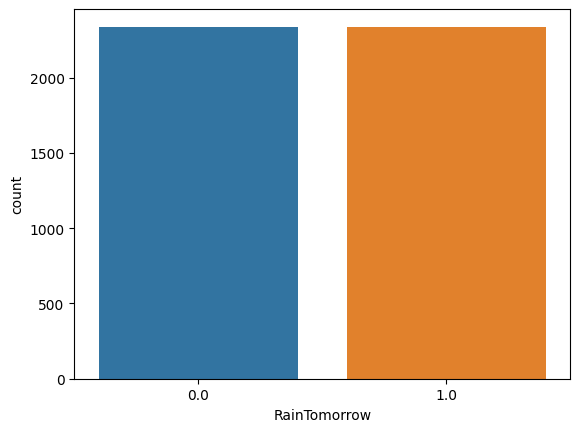

In [52]:
sns.countplot(x=y_os)

In [53]:
X_trainos,X_testos,y_trainos,y_testos=train_test_split(x_os,y_os,test_size=0.3,random_state=1)

**Finding Accuracy using algorithms**

In [54]:
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(kernel='linear')
lst2=[nb,knn,sv]
score1=[]
for i in lst2:
  i.fit(X_trainos,y_trainos)
  y_predos=i.predict(X_testos)
  print('Accuracy_score:',accuracy_score(y_testos,y_predos))
  score1.append(accuracy_score(y_testos,y_predos))
  print(classification_report(y_testos,y_predos))
  print(score1)
  print('*'*100)

Accuracy_score: 0.8376068376068376
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83       673
         1.0       0.83      0.87      0.85       731

    accuracy                           0.84      1404
   macro avg       0.84      0.84      0.84      1404
weighted avg       0.84      0.84      0.84      1404

[0.8376068376068376]
****************************************************************************************************
Accuracy_score: 0.8817663817663818
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87       673
         1.0       0.83      0.97      0.89       731

    accuracy                           0.88      1404
   macro avg       0.89      0.88      0.88      1404
weighted avg       0.89      0.88      0.88      1404

[0.8376068376068376, 0.8817663817663818]
****************************************************************************************************
Accuracy_sco

In [55]:
score1

[0.8376068376068376, 0.8817663817663818, 0.8725071225071225]

In [56]:
Algorithm=['Nb','Knn','Svm']
Accuracy=score
Accuracy_after_OS=score1
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Accuracy_after_OS':Accuracy_after_OS},index=[1,2,3])
Data.style.highlight_max(subset='Accuracy',color='lightgreen')
Data.style.highlight_max(subset='Accuracy_after_OS',color='lightgreen')

,Algorithm,Accuracy,Accuracy_after_OS
1,Nb,0.834029,0.837607
2,Knn,0.843424,0.881766
3,Svm,0.859081,0.872507
